<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Libraries-and-dataframes" data-toc-modified-id="Libraries-and-dataframes-0.0.1"><span class="toc-item-num">0.0.1&nbsp;&nbsp;</span>Libraries and dataframes</a></span></li></ul></li></ul></li><li><span><a href="#Data-exploration" data-toc-modified-id="Data-exploration-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data exploration</a></span><ul class="toc-item"><li><span><a href="#Boxplot" data-toc-modified-id="Boxplot-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Boxplot</a></span></li><li><span><a href="#Normality-test" data-toc-modified-id="Normality-test-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Normality test</a></span><ul class="toc-item"><li><span><a href="#QQ-plots" data-toc-modified-id="QQ-plots-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>QQ plots</a></span></li><li><span><a href="#Loged-data" data-toc-modified-id="Loged-data-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Loged data</a></span></li></ul></li></ul></li><li><span><a href="#ANOVA" data-toc-modified-id="ANOVA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>ANOVA</a></span><ul class="toc-item"><li><span><a href="#Income-and-country" data-toc-modified-id="Income-and-country-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Income and country</a></span></li><li><span><a href="#Income-and-country-logged" data-toc-modified-id="Income-and-country-logged-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Income and country logged</a></span></li></ul></li><li><span><a href="#Linear-regression" data-toc-modified-id="Linear-regression-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Linear regression</a></span><ul class="toc-item"><li><span><a href="#Gini-and-Mean-Income" data-toc-modified-id="Gini-and-Mean-Income-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Gini and Mean Income</a></span></li><li><span><a href="#Gini-and-Mean-income-logged" data-toc-modified-id="Gini-and-Mean-income-logged-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Gini and Mean income logged</a></span></li><li><span><a href="#Gini,-Mean-Income-and-Parent's-salary" data-toc-modified-id="Gini,-Mean-Income-and-Parent's-salary-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Gini, Mean Income and Parent's salary</a></span></li><li><span><a href="#Gini,-Mean-Income-and-Prent's-income-logged" data-toc-modified-id="Gini,-Mean-Income-and-Prent's-income-logged-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Gini, Mean Income and Prent's income logged</a></span></li><li><span><a href="#Comparing-all-the-models" data-toc-modified-id="Comparing-all-the-models-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Comparing all the models</a></span></li></ul></li><li><span><a href="#Question-2:" data-toc-modified-id="Question-2:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Question 2:</a></span></li><li><span><a href="#Question-3:" data-toc-modified-id="Question-3:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Question 3:</a></span><ul class="toc-item"><li><span><a href="#Part-1" data-toc-modified-id="Part-1-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Part 1</a></span></li><li><span><a href="#Part-2" data-toc-modified-id="Part-2-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Part 2</a></span></li></ul></li></ul></div>

based on the model we will want to see if it predicts correctly.

predicting childs income based on country, gdp, income of country, income of parent

country and parents are two big factors



### Libraries and dataframes

In [68]:
from matplotlib.ticker import FuncFormatter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns

import scipy.stats as stats
from scipy.stats import jarque_bera

from functions import * 

from collections import Counter 
import inspect


import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [69]:
df_c= pd.read_csv('Task_2/df_c.csv', index_col=0)
df_c.drop(['gdp_ppp'], axis=1, inplace=True)
df_c.head()

,country,c_i_child,income,gini,elasticity,mi,c_i_parent
0,ALB,1,728,30,0.815874,2994.27,12
1,ALB,1,728,30,0.815874,2994.27,1
2,ALB,1,728,30,0.815874,2994.27,1
3,ALB,1,728,30,0.815874,2994.27,7
4,ALB,1,728,30,0.815874,2994.27,1


# Data exploration

## Boxplot

<Figure size 400x600 with 0 Axes>

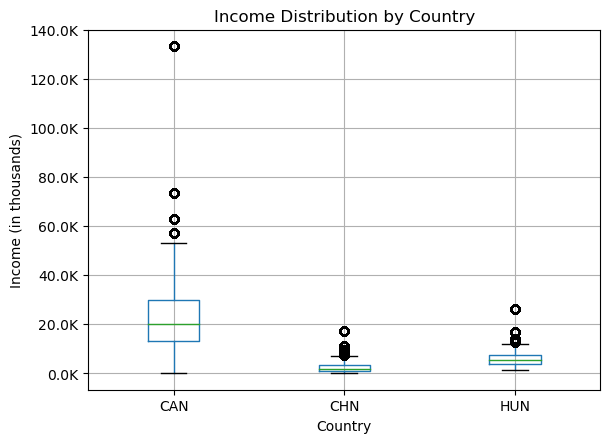

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Function to format y-axis labels
def thousand(x, pos):
    return f'{x * 1e-3:.1f}K'

# Example DataFrame creation (assuming df_c is your DataFrame)
# df_c = pd.DataFrame({'country': ['CAN', 'HUN', 'CHN', ...], 'income': [value1, value2, value3, ...]})

# Which countries to plot
countries_for_boxplot = ['CAN', 'HUN', 'CHN']

# New df for boxplot
boxplot_df = df_c[df_c['country'].isin(countries_for_boxplot)]

# Create the boxplot
plt.figure(figsize=(4, 6))
boxplot_df.boxplot(column='income', by='country')  
plt.xlabel('Country')
plt.ylabel('Income (in thousands)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousand))
plt.title('Income Distribution by Country')
plt.suptitle('')  # Suppress the automatic 'Boxplot grouped by country' title
plt.show()


## Normality test

### QQ plots

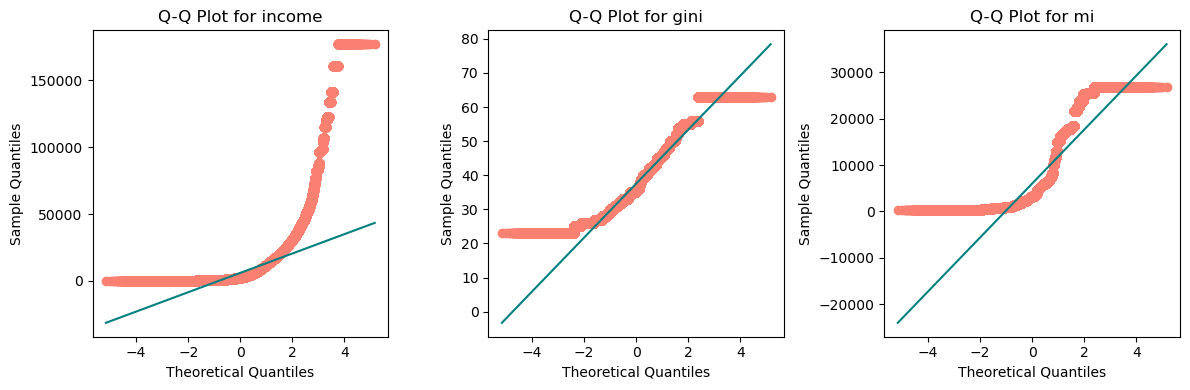

In [71]:
# Using the original data
qq_columns = ['income','gini', 'mi']

# Create Q-Q plots for each column
fig, axes = plt.subplots(nrows=1, ncols=len(qq_columns), figsize=(12, 4))

for i, col in enumerate(qq_columns):
    stats.probplot(df_c[col], dist="norm", plot=axes[i])
    axes[i].get_lines()[0].set_markerfacecolor('salmon')  # Change color of the points
    axes[i].get_lines()[0].set_markeredgecolor('salmon')  # Change color of the point edges
    axes[i].get_lines()[1].set_color('teal')  # Change color of the line
    axes[i].set_title(f'Q-Q Plot for {col}')
    axes[i].set_xlabel('Theoretical Quantiles')
    axes[i].set_ylabel('Sample Quantiles')

plt.tight_layout()
plt.show()


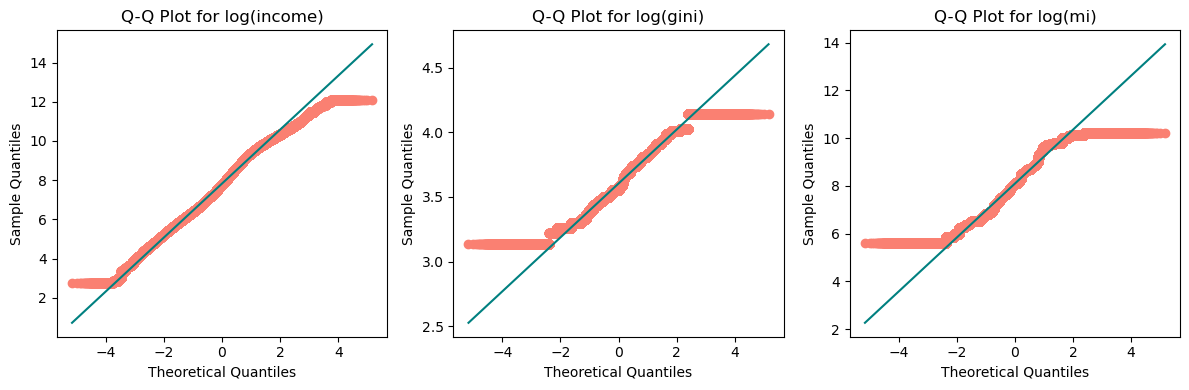

In [72]:
# Using logged data
qq_columns = ['income', 'gini', 'mi']
small_constant = 1e-10  # Define a small constant to avoid log(0)

# Add the small constant to the selected columns and log-transform the data
df_c_log = np.log(df_c[qq_columns] + small_constant)

# Create Q-Q plots for each column
fig, axes = plt.subplots(nrows=1, ncols=len(qq_columns), figsize=(12, 4))

for i, col in enumerate(qq_columns):
    stats.probplot(df_c_log[col], dist="norm", plot=axes[i])
    axes[i].get_lines()[0].set_markerfacecolor('salmon')  # Change color of the points
    axes[i].get_lines()[0].set_markeredgecolor('salmon')  # Change color of the point edges
    axes[i].get_lines()[1].set_color('teal')  # Change color of the line
    axes[i].set_title(f'Q-Q Plot for log({col})')
    axes[i].set_xlabel('Theoretical Quantiles')
    axes[i].set_ylabel('Sample Quantiles')

plt.tight_layout()
plt.show()

In [73]:
columns_to_test = ['income', 'gini', 'mi']

In [74]:
# Original data
# Step 3 and 4: Perform Jarque-Bera test on each selected column
results = {}
for column in columns_to_test:
    jb_stat, p_value = jarque_bera(df_c[column])
    results[column] = (jb_stat, p_value)

# Step 5: Print the results
for column, (jb_stat, p_value) in results.items():
    print(f"Column: {column}")
    print(f"  Jarque-Bera statistic: {jb_stat}")
    print(f"  p-value: {p_value}")
    if p_value < 0.05:
        print("  Reject the null hypothesis: Data is not normally distributed.\n")
    else:
        print("  Fail to reject the null hypothesis: Data is normally distributed.\n")

Column: income
  Jarque-Bera statistic: 453152597.2325278
  p-value: 0.0
  Reject the null hypothesis: Data is not normally distributed.

Column: gini
  Jarque-Bera statistic: 354720.10470932827
  p-value: 0.0
  Reject the null hypothesis: Data is not normally distributed.

Column: mi
  Jarque-Bera statistic: 2498038.7576204706
  p-value: 0.0
  Reject the null hypothesis: Data is not normally distributed.



In [75]:
# Logged data:
#  Perform Jarque-Bera test on each selected column
results = {}
for column in columns_to_test:
    jb_stat, p_value = jarque_bera(df_c_log[column])
    results[column] = (jb_stat, p_value)

# Step 5: Print the results
for column, (jb_stat, p_value) in results.items():
    print(f"Column: {column}")
    print(f"  Jarque-Bera statistic: {jb_stat}")
    print(f"  p-value: {p_value}")
    if p_value < 0.05:
        print("  Reject the null hypothesis: Data is not normally distributed.\n")
    else:
        print("  Fail to reject the null hypothesis: Data is normally distributed.\n")

Column: income
  Jarque-Bera statistic: 80827.7863333807
  p-value: 0.0
  Reject the null hypothesis: Data is not normally distributed.

Column: gini
  Jarque-Bera statistic: 117154.64179268696
  p-value: 0.0
  Reject the null hypothesis: Data is not normally distributed.

Column: mi
  Jarque-Bera statistic: 207473.8267858383
  p-value: 0.0
  Reject the null hypothesis: Data is not normally distributed.



array([[<Axes: title={'center': 'gini'}>]], dtype=object)

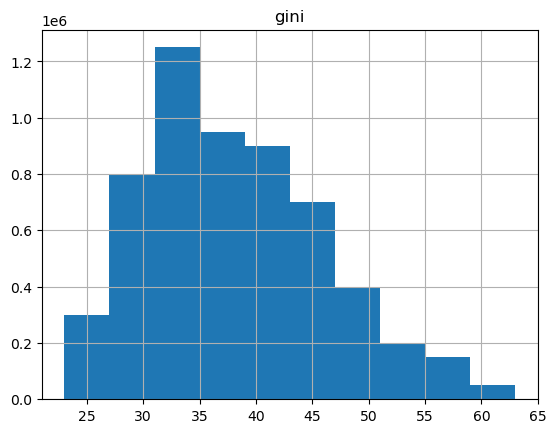

In [76]:
df_c.hist(column = 'gini')

Data doesn't seem to be normally distributed

### Loged data

In [77]:
df_c["income_ln"] = np.log(df_c["income"])
df_c["gini_ln"] = np.log(df_c["gini"])
df_c["mi_ln"] = np.log(df_c["mi"])
df_c["c_i_parent_ln"] = np.log(df_c["c_i_parent"])


df_c.head()

,country,c_i_child,income,gini,elasticity,mi,c_i_parent,income_ln,gini_ln,mi_ln,c_i_parent_ln
0,ALB,1,728,30,0.815874,2994.27,12,6.590301,3.401197,8.004456,2.484907
1,ALB,1,728,30,0.815874,2994.27,1,6.590301,3.401197,8.004456,0.000000
2,ALB,1,728,30,0.815874,2994.27,1,6.590301,3.401197,8.004456,0.000000
3,ALB,1,728,30,0.815874,2994.27,7,6.590301,3.401197,8.004456,1.945910
4,ALB,1,728,30,0.815874,2994.27,1,6.590301,3.401197,8.004456,0.000000


# ANOVA

In [78]:
df_c.head()

,country,c_i_child,income,gini,elasticity,mi,c_i_parent,income_ln,gini_ln,mi_ln,c_i_parent_ln
0,ALB,1,728,30,0.815874,2994.27,12,6.590301,3.401197,8.004456,2.484907
1,ALB,1,728,30,0.815874,2994.27,1,6.590301,3.401197,8.004456,0.000000
2,ALB,1,728,30,0.815874,2994.27,1,6.590301,3.401197,8.004456,0.000000
3,ALB,1,728,30,0.815874,2994.27,7,6.590301,3.401197,8.004456,1.945910
4,ALB,1,728,30,0.815874,2994.27,1,6.590301,3.401197,8.004456,0.000000


Null hypothesis: Incomes are not significantly different depending on countries. 

## Income and country

In [79]:
anova_country = smf.ols('income ~ country',
                       data= df_c).fit()

anova_table = sm.stats.anova_lm(anova_country, typ=2)

In [80]:
print(anova_country.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                 4.974e+04
Date:                Wed, 03 Jul 2024   Prob (F-statistic):               0.00
Time:                        16:54:12   Log-Likelihood:            -5.8265e+07
No. Observations:             5700000   AIC:                         1.165e+08
Df Residuals:                 5699886   BIC:                         1.165e+08
Df Model:                         113                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2994.2700     29.760    100.

In [81]:
anova_table

,sum_sq,df,F,PR(>F)
country,2.489018e+14,113.0,49740.548122,0.0
Residual,2.524092e+14,5699886.0,NaN,NaN


The large F-statistic and low p-value indicate that there is significant different from one another and that I can reject the null hypothesis. 



## Income and country logged

In [82]:
anova_country_log = smf.ols('income_ln ~ country',
                       data= df_c).fit()

anova_table_log = sm.stats.anova_lm(anova_country_log, typ=2)

In [83]:
print(anova_country_log.summary())

                            OLS Regression Results                            
Dep. Variable:              income_ln   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                 1.346e+05
Date:                Wed, 03 Jul 2024   Prob (F-statistic):               0.00
Time:                        16:57:26   Log-Likelihood:            -6.2282e+06
No. Observations:             5700000   AIC:                         1.246e+07
Df Residuals:                 5699886   BIC:                         1.246e+07
Df Model:                         113                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          7.8515      0.003   2432.

In [84]:
anova_table_log

,sum_sq,df,F,PR(>F)
country,7.921240e+06,113.0,134615.893235,0.0
Residual,2.968141e+06,5699886.0,NaN,NaN


This model also has a high F statistic and low p value but the r squared value indicates that the model performed even better

# Linear regression

In [85]:
df_c.head()

,country,c_i_child,income,gini,elasticity,mi,c_i_parent,income_ln,gini_ln,mi_ln,c_i_parent_ln
0,ALB,1,728,30,0.815874,2994.27,12,6.590301,3.401197,8.004456,2.484907
1,ALB,1,728,30,0.815874,2994.27,1,6.590301,3.401197,8.004456,0.000000
2,ALB,1,728,30,0.815874,2994.27,1,6.590301,3.401197,8.004456,0.000000
3,ALB,1,728,30,0.815874,2994.27,7,6.590301,3.401197,8.004456,1.945910
4,ALB,1,728,30,0.815874,2994.27,1,6.590301,3.401197,8.004456,0.000000


## Gini and Mean Income

In [86]:
model_lr1 = smf.ols(formula='income ~ gini + mi', data=df_c).fit()

In [87]:
print(model_lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                 2.810e+06
Date:                Wed, 03 Jul 2024   Prob (F-statistic):               0.00
Time:                        16:57:32   Log-Likelihood:            -5.8265e+07
No. Observations:             5700000   AIC:                         1.165e+08
Df Residuals:                 5699997   BIC:                         1.165e+08
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.873e-09     15.187   1.23e-10      1.0

In [88]:
anova_lr1 = sm.stats.anova_lm(model_lr1,typ=1)

In [89]:
anova_lr1

,df,sum_sq,mean_sq,F,PR(>F)
gini,1.0,2.862790e+13,2.862790e+13,6.464857e+05,0.0
mi,1.0,2.202739e+14,2.202739e+14,4.974306e+06,0.0
Residual,5699997.0,2.524092e+14,4.428234e+07,NaN,NaN


In [90]:
r_sq_g = anova_lr1.sum_sq['gini']/anova_lr1['sum_sq'].sum()
r_sq_g

0.05710606540361468

In [91]:
r_sq_mi = anova_lr1.sum_sq['mi']/anova_lr1['sum_sq'].sum()
r_sq_mi

0.4393956974627202

In [92]:
print(r_sq_g + r_sq_mi)
print(model_lr1.rsquared)

0.4965017628663349
0.4965017628664119


In [93]:
print(f'Decomposition of r-squared of our model:\n\n\
=> The variable \"gini\" explains {100 * r_sq_g:.2f}% of the variance of the variable \"income\"\n\n\
=> The variable \"mi\" explains {100 * r_sq_mi:.2f}% of the variance of the variable \"income\"\n\n\
Our model explains {100 * model_lr1.rsquared:.2f}% of the variance of the variable \"income\"'
)


Decomposition of r-squared of our model:

=> The variable "gini" explains 5.71% of the variance of the variable "income"

=> The variable "mi" explains 43.94% of the variance of the variable "income"

Our model explains 49.65% of the variance of the variable "income"


## Gini and Mean income logged

In [94]:
model_lr1_ln = smf.ols(formula='income_ln ~ gini_ln + mi_ln', data=df_c).fit()

In [95]:
print(model_lr1_ln.summary())

                            OLS Regression Results                            
Dep. Variable:              income_ln   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                 7.504e+06
Date:                Wed, 03 Jul 2024   Prob (F-statistic):               0.00
Time:                        16:57:39   Log-Likelihood:            -6.2561e+06
No. Observations:             5700000   AIC:                         1.251e+07
Df Residuals:                 5699997   BIC:                         1.251e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0819      0.006    322.897      0.0

In [96]:
anova_lr1_ln = sm.stats.anova_lm(model_lr1_ln,typ=1)

In [97]:
anova_lr1_ln

,df,sum_sq,mean_sq,F,PR(>F)
gini_ln,1.0,1.184971e+06,1.184971e+06,2.253507e+06,0.0
mi_ln,1.0,6.707157e+06,6.707157e+06,1.275527e+07,0.0
Residual,5699997.0,2.997253e+06,5.258341e-01,NaN,NaN


In [98]:
r_sq_g_ln = anova_lr1_ln.sum_sq['gini_ln']/anova_lr1_ln['sum_sq'].sum()
r_sq_g_ln

0.1088189591528403

In [99]:
r_sq_mi_ln = anova_lr1_ln.sum_sq['mi_ln']/anova_lr1_ln['sum_sq'].sum()
r_sq_mi_ln

0.6159355591910509

In [100]:
print(r_sq_g_ln + r_sq_mi_ln)
print(model_lr1_ln.rsquared)

0.7247545183438913
0.7247545183439925


In [101]:
print(f'Decomposition of r-squared of our model:\n\n\
=> The variable \"gini\" explains {100 * r_sq_g_ln:.2f}% of the variance of the variable \"income\"\n\n\
=> The variable \"mi\" explains {100 * r_sq_mi_ln:.2f}% of the variance of the variable \"income\"\n\n\
Our model explains {100 * model_lr1_ln.rsquared:.2f}% of the variance of the variable \"income\"'
)


Decomposition of r-squared of our model:

=> The variable "gini" explains 10.88% of the variance of the variable "income"

=> The variable "mi" explains 61.59% of the variance of the variable "income"

Our model explains 72.48% of the variance of the variable "income"


## Gini, Mean Income and Parent's salary

In [102]:
model_lr2 = smf.ols('income ~ gini + mi + c_i_parent', data =df_c).fit()

In [103]:
print(model_lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                 2.072e+06
Date:                Wed, 03 Jul 2024   Prob (F-statistic):               0.00
Time:                        16:57:46   Log-Likelihood:            -5.8119e+07
No. Observations:             5700000   AIC:                         1.162e+08
Df Residuals:                 5699996   BIC:                         1.162e+08
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2603.9282     15.547   -167.490      0.0

In [104]:
# Anova on the linear regression model LR2
anova_lr2 = sm.stats.anova_lm(model_lr2, typ=1)
anova_lr2

,df,sum_sq,mean_sq,F,PR(>F)
gini,1.0,2.862790e+13,2.862790e+13,6.805136e+05,0.0
mi,1.0,2.202739e+14,2.202739e+14,5.236129e+06,0.0
c_i_parent,1.0,1.262132e+13,1.262132e+13,3.000214e+05,0.0
Residual,5699996.0,2.397879e+14,4.206808e+07,NaN,NaN


In [105]:
# Calculation of R-squared for the gini index of the country "gj"
r_sq_g = anova_lr2.sum_sq["gini"] / anova_lr2["sum_sq"].sum()
r_sq_g

0.0571060654036148

In [106]:
# Calculation of R-squared for the average income of the country "mj"
r_sq_mi = anova_lr2.sum_sq["mi"] / anova_lr2["sum_sq"].sum()
r_sq_mi

0.43939569746272117

In [107]:
# Calculation of R-squared for the income class of the parents "c_i_parents"
r_sq_c_i_parent = anova_lr2.sum_sq["c_i_parent"] / anova_lr2["sum_sq"].sum()
r_sq_c_i_parent

0.025176635718956394

In [108]:
print(r_sq_g + r_sq_mi + r_sq_c_i_parent)
print(model_lr2.rsquared)

0.5216783985852923
0.5216783985853666


In [109]:
print(f'Decomposition of r-squared of our model:\n\n\
=> The variable \"gini\" explains {100 * r_sq_g:.2f}% of the variance of the variable \"income\"\n\n\
=> The variable \"mi\" explains {100 * r_sq_mi:.2f}% of the variance of the variable \"income\"\n\n\
=> The variable \"c_i_parent\" explains {100 * r_sq_c_i_parent:.2f}% of the variance of the variable \"income\"\n\n\
Our model explains {100 * model_lr2.rsquared:.2f}% of the variance of the variable \"income\"'
)

Decomposition of r-squared of our model:

=> The variable "gini" explains 5.71% of the variance of the variable "income"

=> The variable "mi" explains 43.94% of the variance of the variable "income"

=> The variable "c_i_parent" explains 2.52% of the variance of the variable "income"

Our model explains 52.17% of the variance of the variable "income"


## Gini, Mean Income and Prent's income logged

In [110]:
df_c

,country,c_i_child,income,gini,elasticity,mi,c_i_parent,income_ln,gini_ln,mi_ln,c_i_parent_ln
0,ALB,1,728,30,0.815874,2994.27,12,6.590301,3.401197,8.004456,2.484907
1,ALB,1,728,30,0.815874,2994.27,1,6.590301,3.401197,8.004456,0.000000
2,ALB,1,728,30,0.815874,2994.27,1,6.590301,3.401197,8.004456,0.000000
3,ALB,1,728,30,0.815874,2994.27,7,6.590301,3.401197,8.004456,1.945910
4,ALB,1,728,30,0.815874,2994.27,1,6.590301,3.401197,8.004456,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
5699995,ZAF,100,82408,63,0.677000,5617.45,80,11.319438,4.143135,8.633633,4.382027
5699996,ZAF,100,82408,63,0.677000,5617.45,98,11.319438,4.143135,8.633633,4.584967
5699997,ZAF,100,82408,63,0.677000,5617.45,86,11.319438,4.143135,8.633633,4.454347
5699998,ZAF,100,82408,63,0.677000,5617.45,95,11.319438,4.143135,8.633633,4.553877


In [111]:
model_lr2_ln = smf.ols('income_ln ~ gini_ln + mi_ln + c_i_parent_ln', data =df_c).fit()

print(model_lr2_ln.summary())

                            OLS Regression Results                            
Dep. Variable:              income_ln   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                 6.450e+06
Date:                Wed, 03 Jul 2024   Prob (F-statistic):               0.00
Time:                        16:57:53   Log-Likelihood:            -5.7138e+06
No. Observations:             5700000   AIC:                         1.143e+07
Df Residuals:                 5699996   BIC:                         1.143e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.8915      0.006    149.503

In [112]:
# Anova on the linear regression model LR2
anova_lr2_ln = sm.stats.anova_lm(model_lr2_ln, typ=1)
anova_lr2_ln

,df,sum_sq,mean_sq,F,PR(>F)
gini_ln,1.0,1.184971e+06,1.184971e+06,2.725771e+06,0.0
mi_ln,1.0,6.707157e+06,6.707157e+06,1.542837e+07,0.0
c_i_parent_ln,1.0,5.193010e+05,5.193010e+05,1.194540e+06,0.0
Residual,5699996.0,2.477952e+06,4.347287e-01,NaN,NaN


In [113]:
# Calculation of R-squared for the gini index of the country "gj"
r_sq_g_ln = anova_lr2_ln.sum_sq["gini_ln"] / anova_lr2_ln["sum_sq"].sum()
r_sq_g_ln

0.10881895915283991

In [114]:
# Calculation of R-squared for the average income of the country "mj"
r_sq_mi_ln = anova_lr2_ln.sum_sq["mi_ln"] / anova_lr2_ln["sum_sq"].sum()
r_sq_mi_ln

0.6159355591910488

In [115]:
# Calculation of R-squared for the income class of the parents "c_i_parents"
r_sq_c_i_parent_ln = anova_lr2_ln.sum_sq["c_i_parent_ln"] / anova_lr2_ln["sum_sq"].sum()
r_sq_c_i_parent_ln

0.047688746274041294

In [116]:
print(r_sq_g_ln + r_sq_mi_ln + r_sq_c_i_parent_ln)

0.77244326461793


In [117]:
print(model_lr2_ln.rsquared)

0.7724432646180127


In [118]:
print(f'Decomposition of r-squared of our model:\n\n\
=> The variable \"gini\" explains {100 * r_sq_g_ln:.2f}% of the variance of the variable \"income\"\n\n\
=> The variable \"mi\" explains {100 * r_sq_mi_ln:.2f}% of the variance of the variable \"income\"\n\n\
=> The variable \"c_i_parent\" explains {100 * r_sq_c_i_parent_ln:.2f}% of the variance of the variable \"income\"\n\n\
Our model explains {100 * model_lr2_ln.rsquared:.2f}% of the variance of the variable \"income\"'
)

Decomposition of r-squared of our model:

=> The variable "gini" explains 10.88% of the variance of the variable "income"

=> The variable "mi" explains 61.59% of the variance of the variable "income"

=> The variable "c_i_parent" explains 4.77% of the variance of the variable "income"

Our model explains 77.24% of the variance of the variable "income"


## Comparing all the models

In [119]:
models = {
    "gini + mean income : ": model_lr1,
    "gini + mean income logged :": model_lr1_ln,
    "gini + mean income + parents income class :": model_lr2,
    "gini + mean income + parents income class logged : ": model_lr2_ln
}


print('What % of the variance of the variable "income" do the models explain?\n')


for model_name, model in models.items():
    print(f'{model_name} {100 * model.rsquared:.2f}%')
    


What % of the variance of the variable "income" do the models explain?

gini + mean income :  49.65%
gini + mean income logged : 72.48%
gini + mean income + parents income class : 52.17%
gini + mean income + parents income class logged :  77.24%


Clearly, the best performing model is the last one, using the gini, mean and parent's income class logged can explain around 77.24% of the child's income.

# Question 2:

How can we know that there are less people benefiting from a higher gini index? 


As we can see, in all the models, but below I have the summary statistics of model 4, you can tell that the gini coefficient and the income of an individual is negatively correlated. This means that, in the case of model 4, for a one-unit increase in gini_ln, income_ln is expected to decrease by approximately 
0.6243. This means the majority of people's income will decrease with the increase of a higher gini. 

In [120]:
print(model_lr2_ln.summary().tables[1])

                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.8915      0.006    149.503      0.000       0.880       0.903
gini_ln          -0.6231      0.001   -454.761      0.000      -0.626      -0.620
mi_ln             0.9872      0.000   3927.620      0.000       0.987       0.988
c_i_parent_ln     0.3268      0.000   1092.950      0.000       0.326       0.327


# Question 3:

## Part 1

Is this model worth using? 

R-squared: 0.772
This indicates that approximately 77.2% of the variance in income_ln is explained by the model. The value suggests that the model fits the data well.

P-values:
All predictors (Intercept, gini_ln, mi_ln, and c_i_parent_ln) have p-values of 
0.000, indicating that they are all statistically significant at any common significance level (e.g., 0.05, 0.01).
This suggests that each variable makes a meaningful contribution to predicting income_ln.


F-statistic: 6.450e+06 with a p-value of 0.00
This indicates that the overall model is statistically significant, meaning that at least one predictor is significantly related to the dependent variable.


## Part 2

Recap of model 4: 

- Intercept: 0.8943
- gini_ln coefficient:−0.6243
- mi_ln coefficient: 0.9872
- c_i_parent_ln coefficient: 0.3270


In [121]:
intercept = 0.8943
gini_ln_coef = -0.6243
mi_ln_coef = 0.9872
c_i_parent_ln_coef = 0.3270

y= exp( intercept + (gini_ln_coef x gini_ln) + (mi_ln_coef x mi_ln) + (c_i_parent_ln_coef x c_i_parent_ln) 

In [122]:
y = intercept

In [123]:
# I'm just going to make a table for each country with the data that is 
# the 50th percent for the parent income.
df_mean = df_c[df_c['c_i_parent'] == 50]
df_mean.head()

,country,c_i_child,income,gini,elasticity,mi,c_i_parent,income_ln,gini_ln,mi_ln,c_i_parent_ln
604,ALB,2,916,30,0.815874,2994.27,50,6.820016,3.401197,8.004456,3.912023
643,ALB,2,916,30,0.815874,2994.27,50,6.820016,3.401197,8.004456,3.912023
1017,ALB,3,1010,30,0.815874,2994.27,50,6.917706,3.401197,8.004456,3.912023
1260,ALB,3,1010,30,0.815874,2994.27,50,6.917706,3.401197,8.004456,3.912023
1613,ALB,4,1086,30,0.815874,2994.27,50,6.990257,3.401197,8.004456,3.912023


In [124]:
df_mean = df_mean[['country', 'gini_ln', 'mi_ln','c_i_parent_ln']]
df_mean = df_mean.groupby(by=['country']).first()
df_mean.head()

,gini_ln,mi_ln,c_i_parent_ln
country,,,
ALB,3.401197,8.004456,3.912023
ARG,3.806662,8.673758,3.912023
ARM,3.367296,7.395034,3.912023
AUT,3.401197,9.719389,3.912023
AZE,3.258097,7.765098,3.912023


In [125]:
# Define the function to calculate y
def calculate_y(row):
    return np.exp(intercept + 
            gini_ln_coef * row['gini_ln'] + 
            mi_ln_coef * row['mi_ln'] + 
            c_i_parent_ln_coef * row['c_i_parent_ln'])

# Apply the function to each row in the DataFrame
df_mean['predicted_child_income'] = df_mean.apply(calculate_y, axis=1)

# Display the DataFrame with the new column
df_mean

,gini_ln,mi_ln,c_i_parent_ln,predicted_child_income
country,,,,
ALB,3.401197,8.004456,3.912023,2841.714099
ARG,3.806662,8.673758,3.912023,4271.693200
ARM,3.367296,7.395034,3.912023,1590.344816
AUT,3.401197,9.719389,3.912023,15446.612979
AZE,3.258097,7.765098,3.912023,2453.342916
...,...,...,...,...
USA,3.688879,10.146555,3.912023,19677.742708
VEN,3.784190,8.060436,3.912023,2364.505521
VNM,3.555348,7.227866,3.912023,1199.040418


Let's pick a country to filter the dataset for: 

In [126]:
country_to_filter = 'HUN'

Let's look at what your salary would be if your parents earned an average salary in given country based on the data we were given.

In [127]:
df_mean_reset = df_mean.reset_index()
df_mean_reset[df_mean_reset['country'] == country_to_filter]

,country,gini_ln,mi_ln,c_i_parent_ln,predicted_child_income
43,HUN,3.295837,8.716182,3.912023,6127.580094


Another way to check what would be my expected salary if my parent's were in the 50th percentile is by simply looking at the graph of all possibilities: 

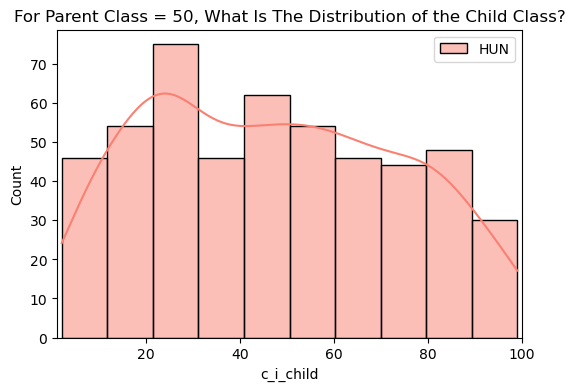

In [128]:
for parent_class in [50]:
    plt.figure(figsize = (6,4))
    plt.xlim(1,100)
    plt.title(f'For Parent Class = {parent_class}, What Is The Distribution of the Child Class?')
    
    sns.histplot(data = df_c[(df_c.country == country_to_filter) & 
                          (df_c.c_i_parent == parent_class)], 
             x = "c_i_child", kde = True, color = "salmon", label = country_to_filter)
    
    plt.legend()